### STA 4724: Homework 3 - Due Friday, Oct. 18 
**Instructions**: Finsih the assign by directly answering the question or finishing the code in this Jupyter notebook. 

After you finish, submit the saved notebook to webcourses.

**Your name:** Mustaeen Ahmed      

**Your ID:** 5530892

## Question 1: kNN
For the *yeast* dataset, we want to predicte the compartment in a cell that a yeast protein will localize to based on properties of its sequence.

**(a)** Read the training and testing datasets.

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

df_train = pd.read_csv('yeast_train.csv')
df_test = pd.read_csv('yeast_test.csv')

X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values

X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values

df_test.head(), df_train.head()

(   id    f0    f1    f2    f3   f4   f5    f6    f7 class
 0   1  0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22   CYT
 1   2  0.40  0.42  0.57  0.35  0.5  0.0  0.53  0.25   CYT
 2   3  0.58  0.47  0.54  0.11  0.5  0.0  0.51  0.26   NUC
 3   4  0.50  0.34  0.55  0.21  0.5  0.0  0.49  0.22   NUC
 4   5  0.61  0.60  0.55  0.21  0.5  0.0  0.50  0.25   NUC,
    id    f0    f1    f2    f3   f4   f5    f6    f7 class
 0   1  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
 1   2  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
 2   3  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
 3   4  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
 4   5  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT)

**(b)** Use leave-one-out cross validation to select the value of $k$ for kNN model.

Hint 1: try to apply kNN with a fixed $k$ first, then figure out how to use cross validation. In *yeast_3.txt*, I list the result when $k=3$ and you can use it as a reference.

Hint 2: Some of the $k$ values are not suitable to be the "best". You shouldn't even test them in the cross validation.

In [111]:
n = len(X_train)

k_candidates = []
for i in range(1, min(n, 51)):
    if i % 2 == 1:
        k_candidates.append(i)

leave_one = LeaveOneOut()
knn = KNeighborsClassifier()

param_grid = {"n_neighbors": k_candidates}
grid = GridSearchCV(knn, param_grid, cv=leave_one, n_jobs=-1)
grid.fit(X_train, y_train)

best_k = grid.best_params_['n_neighbors']
best_k

1

**(c)** Train the kNN model with the best $k$, and use it to predicte the testing data.

In [112]:
best = KNeighborsClassifier(n_neighbors=best_k)
best.fit(X_train, y_train)
y_pred = best.predict(X_test)

y_pred[:10]

array(['MIT', 'MIT', 'MIT', 'NUC', 'MIT', 'MIT', 'NUC', 'MIT', 'CYT',
       'NUC'], dtype=object)

**(d)** Print the confusion matrix, then manually compute the accuracy based on the confusion matrix. That is, don't call any built-in function for the accuracy, but type the equation you will use for calculating the accuracy.

In [113]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))

correct = np.trace(cm)
total = cm.sum()
accuracy = correct / total

cm, accuracy

(array([[31,  1,  5,  3, 12, 12, 38, 34,  1,  1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 5,  0,  0,  0,  0,  0,  1,  3,  0,  1],
        [ 1,  1,  0,  0,  0,  2,  6,  4,  0,  0],
        [ 8,  0,  1,  2,  1,  1,  2,  3,  0,  0],
        [13,  1,  0,  1,  1,  5,  9, 17,  0,  0],
        [28,  0,  5,  2,  4,  9, 19, 12,  1,  1],
        [32,  1,  1,  2,  1, 17, 32, 35,  2,  0],
        [ 3,  0,  0,  0,  0,  1,  3,  1,  0,  0],
        [ 2,  0,  0,  1,  0,  0,  1,  2,  0,  0]]),
 np.float64(0.20449438202247192))

## Question 2: Logistic Regression

We study the *myopia* dataset in this problem.

**(a)** Read the data file and make a scatterplot of MYOPIA vs. SPHEQ.

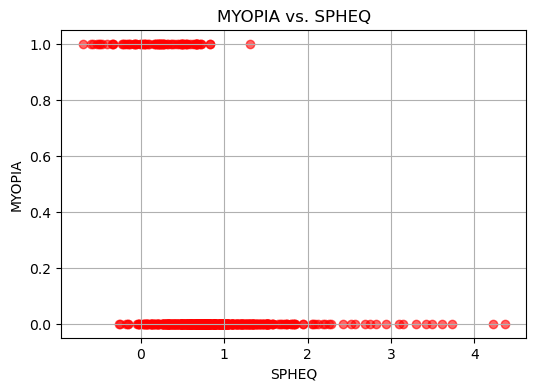

In [114]:
myopia = pd.read_csv('myopia.csv')

myopia.head()

plt.figure(figsize=(6, 4))
plt.scatter(myopia['SPHEQ'], myopia['MYOPIC'], alpha=0.6, color='red')
plt.xlabel('SPHEQ')
plt.ylabel("MYOPIA")
plt.title("MYOPIA vs. SPHEQ")
plt.grid(True)
plt.show()

**(b)** Fit the logistic regression model of SPHEQ on MYOPIA

In [115]:
from sklearn.linear_model import LogisticRegression

X = myopia[['SPHEQ']]
y = myopia['MYOPIC']

log = LogisticRegression(random_state=0)
log.fit(X, y)

inter = log.intercept_[0]
slope = log.coef_[0][0]

inter, slope

(np.float64(-0.14077569188122988), np.float64(-3.3092655638218162))

**(c)** Plot the logistic function found in (b) together with the scatterplot. You are looking for something like 

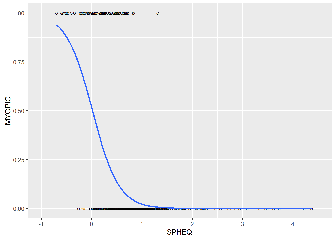

Hint: Although we didn't make this logistic function plot in class, the idea behind it is similar to the linear function plot in the earlier lecture. 

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


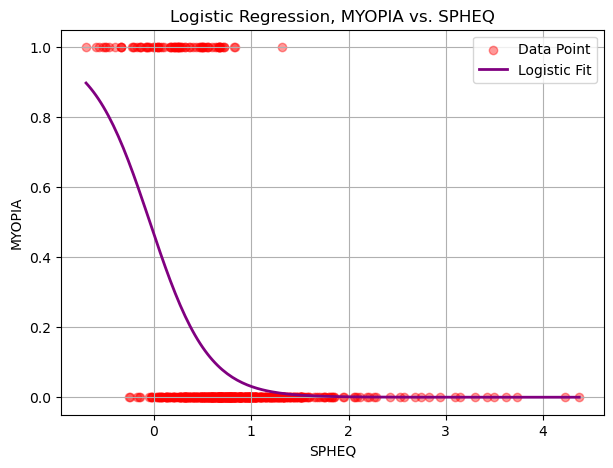

In [116]:
spheq = np.linspace(myopia['SPHEQ'].min(), myopia['SPHEQ'].max(), 200).reshape(-1, 1)

p_hat = log.predict_proba(spheq)[:, 1]

plt.figure(figsize=(7, 5))
plt.scatter(myopia['SPHEQ'], myopia['MYOPIC'], color="red", alpha=0.4, label="Data Point")
plt.plot(spheq, p_hat, color="purple", linewidth=2, label="Logistic Fit")

plt.xlabel("SPHEQ")
plt.ylabel("MYOPIA")
plt.title("Logistic Regression, MYOPIA vs. SPHEQ")
plt.legend()
plt.grid(True)
plt.show()

## Question 3: Naive Bayes
We have the *vote* datasets collected from 1984 United States Congressional Voting Records.

**(a)** Read the training and testing data file, and make any necessary preprocess so the data is ready to be used by naive bayes.

Hint: computer cannot read 'y/n' just like it cannot read tweets directly.

In [117]:
vote_train = pd.read_csv("vote_train.csv")
vote_test = pd.read_csv("vote_test.csv")

raw_X_train = vote_train.iloc[:, :-1].copy()
y_train = vote_train.iloc[:, -1].copy()

raw_X_test = vote_test.iloc[:, :-1].copy()
y_test = vote_test.iloc[:, -1].copy()

def map_votes(df):
    return df.replace({'y': 1, 'n': 0})

X_train = raw_X_train.replace({'y': 1, 'n': 0}).astype(int)
X_test = raw_X_test.replace({'y': 1, 'n': 0}).astype(int)

y_train = y_train.replace({"republican": 1, "democrat": 0}).astype(int)
y_test = y_test.replace({"republican": 1, "democrat": 0}).astype(int)

X_train.shape, X_test.shape

/var/folders/99/ks3jdxtx1kqfyzx43_rx_29m0000gn/T/ipykernel_67988/2517500079.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = raw_X_train.replace({'y': 1, 'n': 0}).astype(int)
/var/folders/99/ks3jdxtx1kqfyzx43_rx_29m0000gn/T/ipykernel_67988/2517500079.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = raw_X_test.replace({'y': 1, 'n': 0}).astype(int)
/var/folders/99/ks3jdxtx1kqfyzx43_rx_29m0000gn/T/ipykernel_67988/2517500079.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be re

((379, 17), (56, 17))

**(b)** Train the bayes model and use it to predict the voting result on the testing data.

In [118]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(y_pred[:10])
print(y_test[:10])

[1 0 0 1 0 1 1 0 0 1]
0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: 'class', dtype: int64


**(c)** Plot the ROC curve and report AUC.

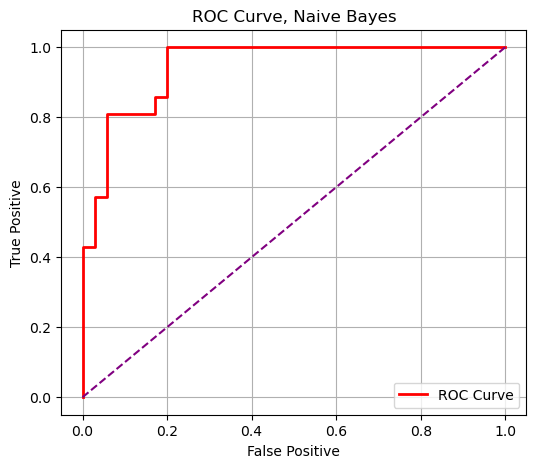

np.float64(0.9455782312925171)

In [119]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="red", lw=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], "--", color="purple")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve, Naive Bayes")
plt.legend()
plt.grid(True)
plt.show()

auc